In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
import math
from sklearn.preprocessing import StandardScaler
from IPython.display import Markdown as md #For displaying results in md
from scipy import stats # module For removing outliers in this program.
%matplotlib inline

In [2]:
# import csv file using pandas
bags = pd.read_csv ('Data_miniproject.csv');

# remove cost feature 0 valued rows 
bags = bags[bags.Cost != 0]

# We are gonna eliminate outliers using z-scores from Scipy library.
z_scores = stats.zscore(bags)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
bags = bags[filtered_entries]

# Taking  dependent variables as X and independent variable(COST) as y
X = bags.iloc[:,1:6]
y = bags.iloc[:,0].values

# Scaling the Data so that computations will be much faster and also easily understood by machine while computing
column_names = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=column_names)

# Splitting data into test and train sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
# Calculating Hypotheses which is nothing but prediction of next value along the curve
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

# Gradien descent algorithm using python code.
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

# Linear Regression function that calls GD algo and returns theta and Cost Values.
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    # Concating a identity matrix of size (length of X,1) to X. so now we'll have an extra column to find Wo.
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [4]:
iterations = 1000

# Calling the GD algorithm to get theta and cost which says about converging. 
theta, cost = linear_regression(X_train, y_train, 0.01, iterations)
print("theta : ",theta)

# Estimating the Modal

X_build = np.concatenate((np.ones((X_test.shape[0],1)), X_test),axis = 1)       
predictions = hypothesis(theta, X_build, X_build.shape[1] - 1)
y_pred_gd = list(predictions)

# Now we'll see whether the convergence occured or not?
n_iterations = [x for x in range(1,iterations+1)]
cost = list(cost)
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')


theta :  [[374.85639952  55.45289323  50.91138303  35.07391986  66.96629883
  118.31057325]]


Text(0, 0.5, 'Cost')

------------------------------------------------------------------------------------------
       MSE                 RMSE                 RSE                  R SQUARE  
------------------------------------------------------------------------------------------
10299.920391794458  | 101.48852344868585 |   10468.771545758302  |   0.8961981336005783   
------------------------------------------------------------------------------------------


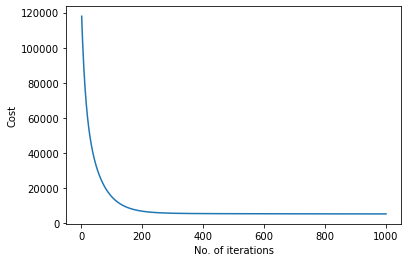

In [5]:

# Calculating Errors
gd_mse = mean_squared_error(y_test,y_pred_gd)
gd_rmse = math.sqrt(gd_mse)
gd_rse = (gd_rmse**2)*X_train.shape[0]
gd_rse /= X_train.shape[0]-2
gd_r2 = r2_score(y_test, y_pred_gd, sample_weight=None, multioutput='uniform_average')

# Displaying Errors and score
dash = '-' * 90
print(dash)
print('{:>10} {:>20} {:^35} {:^10} '.format("MSE","RMSE","RSE","R SQUARE"))
print(dash)
print('{:<20}| {:>14} | {:^22}| {:^22} '.format(gd_mse,gd_rmse,gd_rse,gd_r2))
print(dash)


### Conclusion <br />

In [6]:
md("*As we can see the RSquare Score is **{}**. Saying that,this modal fits **{}%** which shows that the current modal is a good fit.*".format(gd_r2, math.floor(gd_r2*100)))

*As we can see the RSquare Score is **0.8961981336005783**. Saying that,this modal fits **89%** which shows that the current modal is a good fit.*